# Research Project
COMP 435 Introduction to Machine Learning, Spring 2025

- Instructor: Jon Hutchins
- Author: Ina Tang
- Dataset: Sentiment140 on [Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140/data)
- Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

> Just 75% accuracy would be good... – Dr. Hutchins

### Schema
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY. 
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

### Ideas

- [x] Proportions of + and -
- [x] Total frequency of word
    - [x] remove pronouns, prepositions, conjunctions, article adjectives, etc. ?
    - [x] cutoff for words with (say) less than 1% frequency 
- [x] Correlation between word and each label (porportions)
- [ ] Affect of capitalization and punctuations on prediction
- [ ] Use deep neural network(s) to identify strong FPs and FNs (weird data points)
- [ ] (Synthesized feature) Certain collection(s) of words that strongly correlates with one of the labels


### Previous labs
- [Linear Regression with a Real Dataset](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb)
- [Linear Regression with Synthetic Data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)
- [Logistic Regression](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/core/logistic_regression_core.ipynb)

## Setup

In [84]:
# pip install numpy pandas matplotlib seaborn  # torch

In [85]:
import numpy as np
import pandas as pd
# import torch
import matplotlib.pyplot as plt
import seaborn as sns  # sns.pairplot

from typing import Dict, List

In [86]:
# generated by GitHub Copilot with minor edits

# Load & setup
# runtime: 5s
df = pd.read_csv('data.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']  # target: 0 = negative, 4 = positive
df['target'] = df['target'].replace({4: 1})  # Replace 4s (positives) with 1s in the 'target' column
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [87]:
print(f"Total number of examples: {df['target'].value_counts().sum()}")

Total number of examples: 1600000


In [88]:
# Helpful constants

NUMBER_OF_TARGET_VALUES = 2
TOTAL_NUMBER_OF_EXAMPLES = 16000000

In [89]:
# Apply seaborn style to all matplotlib plots!
sns.set_theme(style="whitegrid", palette="pastel")

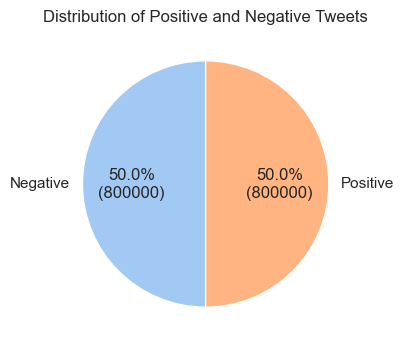

In [90]:
# generated by GitHub Copilot with minor edits

# Plot ratio of positive and negative tweets
# runtime: 0s

def func(pct, allvals):
    absolute = int(np.round(pct / 100. * np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

# Data for the pie chart
data = df['target'].value_counts()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    data, 
    labels=['Negative', 'Positive'],  # Adjust labels as needed
    autopct=lambda pct: func(pct, data), 
    startangle=90
)
plt.title('Distribution of Positive and Negative Tweets')
plt.show()

## "Unigram" / Inidivdual Words

In [ ]:
# generated by GitHub Copilot with minor edits
# runtime: 45s

print("Counting words...")
word_counts: Dict[str, Dict[int, int]] = {}  # word -> target -> frequency

for i, row in df.iterrows():
    words: List[str] = list(set(row['text'].split()))
    target: int = row['target']
    for word in words:
        if word in word_counts:
            word_counts[word][target] += 1
        else:
            word_counts[word] = {0: 0, 1: 0}  # initialize
            word_counts[word][target] = 1

Counting words...


In [ ]:
# generated by GitHub Copilot with minor edits
# runtime: 15s

word_counts_df = pd.DataFrame(word_counts).T.reset_index()
word_counts_df.columns = ['word', 'neg', 'pos']
# pos: number of positive examples which contains the word
word_counts_df['total'] = word_counts_df['neg'] + word_counts_df['pos']
word_counts_df = word_counts_df.sort_values(by='total', ascending=False)

word_counts_df.head()

,word,neg,pos,total
0,to,243891,205548,449439
1,the,198554,204706,403260
2,I,225262,157744,383006
3,a,154666,166868,321534
4,my,148772,103172,251944


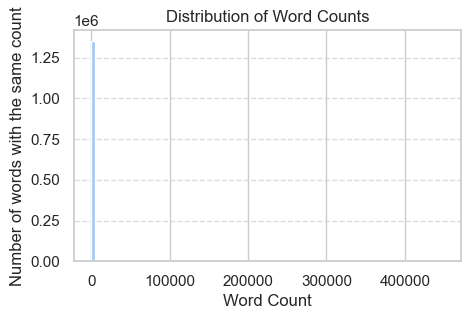

In [ ]:
# generated by GitHub Copilot with minor edits

# Plot the distribution of the words
plt.figure(figsize=(5, 3))
plt.hist(word_counts_df['total'], bins=100)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of words with the same count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Since most words appears only a few times in the entire dataset, the plot is strongly right-skewed. We can verify that the plot is not just one bar but is in fact right-skewed with the following operation: 

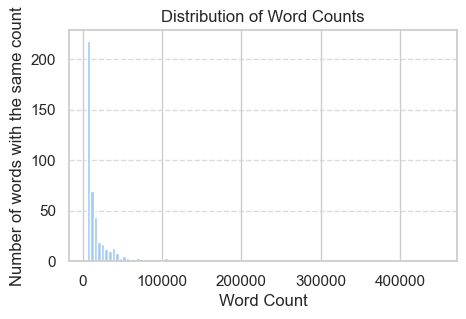

In [ ]:
# remove words that appear only a certain number of times in the dataset to visualize the distribution better
word_counts_trimmed_df = word_counts_df[word_counts_df['total'] > 5000]

# plot the distribution of the words again
plt.figure(figsize=(5, 3))
plt.hist(word_counts_trimmed_df['total'], bins=100)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of words with the same count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Filtered / Remove neutral words

We can remove article adjectives, conjunctions, prepositions, etc. to see better if there are particular words that or collections of words are correlated to positive or negative emotion. 

In [ ]:
# generated by GitHub Copilot with minor edits

pronouns: List[str] = ['i', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'whose', 'this', 'that', 'these', 'those']  
helping_verbs: List[str] = ['am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'shall', 'will', 'should', 'would', 'may', 'might', 'must', 'can', 'could']
article_adj: List[str] = ['a', 'an', 'the']
conjunctions: List[str] = ['and', 'but', 'or', 'nor', 'for', 'yet', 'so']
prepositions: List[str] = ['aboard', 'about', 'above', 'across', 'after', 'against', 'along', 'among', 'around', 'at', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'by', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 'like', 'near', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'past', 'since', 'through', 'throughout', 'to', 'toward', 'under', 'underneath', 'until', 'up', 'upon', 'with', 'within', 'without']
neutral_words: List[str] = pronouns + helping_verbs + article_adj + conjunctions + prepositions

word_counts_filtered_df = word_counts_df[~word_counts_df['word'].str.lower().isin(neutral_words)]
word_counts_filtered_df.head()

,word,neg,pos,total
22,just,48767,45315,94082
23,I'm,52391,40770,93161
25,not,59359,25921,85280
27,get,42487,31566,74053
31,all,33968,31831,65799


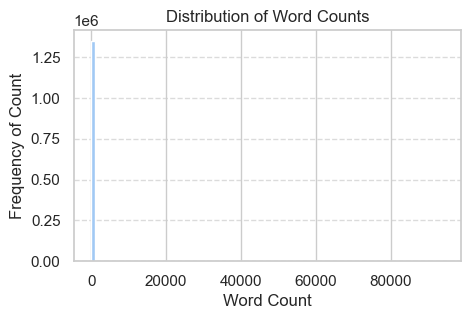

In [ ]:
# Plot again
plt.figure(figsize=(5, 3))
plt.hist(word_counts_filtered_df['total'], bins=100)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency of Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now we can actually see somethings from the data...We can create a another column representing the relative frequency of positive tweets associated with the word. 

In [ ]:
# generated by GitHub Copilot with minor edits

word_counts_filtered_df['pos_ratio'] = word_counts_filtered_df['pos'] / word_counts_filtered_df['total']
word_counts_filtered_df['intensity'] = abs(word_counts_filtered_df['pos_ratio'] - 0.5) / 0.5  # [0, 1], how strongly the word is correlated with either positive or negative
word_counts_filtered_df = word_counts_filtered_df.sort_values(by='intensity', ascending=False)

word_counts_filtered_df.head()

/var/folders/jf/9yw5p_gd5fn_t20w9pgwzdv80000gn/T/ipykernel_20438/54581162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_counts_filtered_df['pos_ratio'] = word_counts_filtered_df['pos'] / word_counts_filtered_df['total']
/var/folders/jf/9yw5p_gd5fn_t20w9pgwzdv80000gn/T/ipykernel_20438/54581162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_counts_filtered_df['intensity'] = abs(word_counts_filtered_df['pos_ratio'] - 0.5) / 0.5  # [0, 1], how strongly the word is correlated with either pos

,word,neg,pos,total,pos_ratio,intensity
675485,#theregister,1,0,1,0.0,1.0
900514,notables,0,1,1,1.0,1.0
900512,"@mukund,",0,1,1,1.0,1.0
900511,stellie!,0,1,1,1.0,1.0
900510,http://tinyurl.com/o7r24x,0,1,1,1.0,1.0


- `pos_ratio` is the proportion of positive examples wrt all examples
- `intensity` is a measurement of strength of the word's correlation with either a positive or negative emotion, i.e., the distance between `pos_ratio` and `0.5`. 
    - 0.5 means the word occurs equally frequently in positive and negative tweets
    - i.e, the word is not directly correlated with either emotion

Notice the examples that might cause overfitting :) While some words are very strongly correlated with emotions (i.e., they only appear in positive/negative tweets), their relative frequency in the dataset is negligible. We might as well remove words with negligible frequency...

In [ ]:
threshhold: float = 0.0001  # minimum relative frequency; play with this

word_counts_filtered_df = word_counts_filtered_df[word_counts_filtered_df['total'] > threshhold * TOTAL_NUMBER_OF_EXAMPLES]
word_counts_filtered_df.head()

,word,neg,pos,total,pos_ratio,intensity
961,Sad,1937,80,2017,0.039663,0.920674
675,sad.,2946,138,3084,0.044747,0.910506
1064,#followfriday,86,1733,1819,0.952721,0.905443
121,sad,18033,936,18969,0.049344,0.901313
428,hurts,5168,278,5446,0.051047,0.897907


In [ ]:
word_pos_filtered_df = word_counts_filtered_df[word_counts_filtered_df['pos_ratio'] > 0.5].sort_values(by='intensity', ascending=False)
word_neg_filtered_df = word_counts_filtered_df[word_counts_filtered_df['pos_ratio'] < 0.5].sort_values(by='intensity', ascending=False)

NUMBER_OF_WORDS: int = 20
print(f"Top {NUMBER_OF_WORDS} positive words (filtered): {word_pos_filtered_df['word'].iloc[:NUMBER_OF_WORDS].values}")
print(f"Top {NUMBER_OF_WORDS} negative words (filtered): {word_neg_filtered_df['word'].iloc[:NUMBER_OF_WORDS].values}")

Top 20 positive words (filtered): ['#followfriday' 'welcome' 'Welcome' 'Once' 'Thanks!' 'Thank' 'Thanks'
 'smile' 'proud' 'thanks!' 'thank' 'thanks' 'Happy' 'Nice' 'wonderful'
 'Goodnight' 'Get' 'Hi' 'Hello' 'Glad']
Top 20 negative words (filtered): ['Sad' 'sad.' 'sad' 'hurts' 'throat' 'headache' 'Poor' 'upset' 'sucks'
 'died' 'sick.' 'sick' 'tummy' 'ugh' 'stomach' 'poor' 'horrible' 'broken'
 'sucks.' 'worst']


##### Positive

Funny how '#followfriday' is the word (more precisely, hashtag) most associated with positive emotion. This might be because the data is tweets, i.e., if our data were day-to-day conversations, '#followfriday' might not be such an intense word. 

'welcome' being the second most positive word underscores the importance of hospitality. 

Personally I don't understand why 'Get' is a very positive word. This might be because the dataset do not label tweets as neutral, even though some certainly are. 

Fun how 'Hi' and 'Hello' are associated with positive tweets. I suppose sad/stressed/angry people usually won't care to greet people. 

No idea why 'Once' would be a very positive word. Maybe when sharing (past) stories people tend to share more about funny/encouraging ones on Twitter than sad, depressing ones. 

'Goodnight' is so sweet. 

##### Negative


'Sad' must be a very negative word...

These words all make sense. It's interesting how some of the negative words are about physical (pain, I'd assume): 'throat', 'headache', 'sick', tummy' and 'stomach'...('hurts' and 'upset' could be physical too) Considering the fact that the abdomen made it on the list twice, stomach pain could potentially be one of the main causes of negative emotion?

##### Capitalization, punctuation, abbreviation
Notice the effects that capitalization, punctuation, and abbreviations might have: (more intense > less intense)

- Positives
    - welcome > Welcome
    - Thanks! > Thank > Thanks > thanks! > thank > thanks
    - Hi > Hello
- Negatives
    - Sad > sad. > sad
    - Poor > poor
    - sucks > sucks.
    - sick. > sick

It seems like more often than not capitalization, '!', and '.' is associated with stronger emotion, except with 'welcome' and 'sucks'. This makes sense since the emotion is heavily dependent on the context. When a person say something sucks, if he/she probably would not use just one period for emphasis, but "I'm sad." does feel more sad than "I'm sad". I cannot make sense of 'welcome' over 'Welcome', but 'welcome' could be part of "You're welcome" whereas "Welcome" tends to stand by itself meaningwise. 

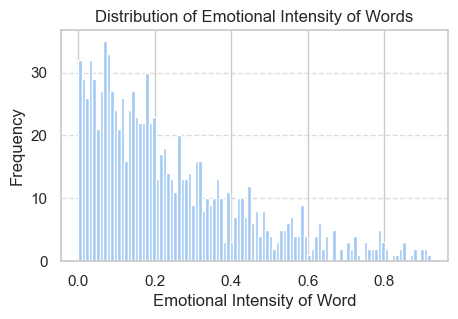

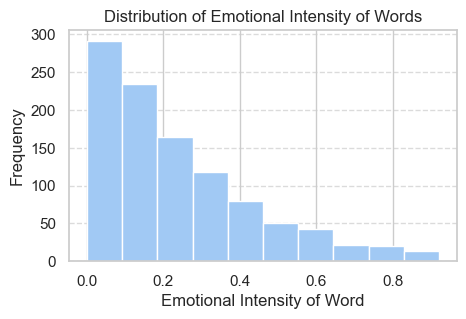

In [ ]:
# Plot the distribution of intensity

# bin = 100
plt.figure(figsize=(5, 3))
plt.hist(word_counts_filtered_df['intensity'], bins=100)
plt.title('Distribution of Emotional Intensity of Words')
plt.xlabel('Emotional Intensity of Word')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# bin = 10
plt.figure(figsize=(5, 3))
plt.hist(word_counts_filtered_df['intensity'], bins=10)
plt.title('Distribution of Emotional Intensity of Words')
plt.xlabel('Emotional Intensity of Word')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A quintessential right-skewed distribution! i.e., most words are not emotionally intense. 

A synthetic feature multiplying total and intensity would reveal the most common words with considerable emotional intensity. 

In [ ]:
# modify intensity to account for trustworthiness / quantity / total
word_counts_filtered_df['total x intensity'] = (word_counts_filtered_df['intensity'] * word_counts_filtered_df['total'])
word_counts_filtered_df = word_counts_filtered_df.sort_values(by='total x intensity', ascending=False)

word_counts_filtered_df.head(10)

,word,neg,pos,total,pos_ratio,intensity,total x intensity
25,not,59359,25921,85280,0.303952,0.392097,33438.0
76,miss,27753,4658,32411,0.143717,0.712567,23095.0
43,love,12800,35220,48020,0.733444,0.466889,22420.0
44,no,34460,13148,47608,0.276172,0.447656,21312.0
46,work,32027,12681,44708,0.283641,0.432719,19346.0
35,good,19707,38362,58069,0.660628,0.321256,18655.0
121,sad,18033,936,18969,0.049344,0.901313,17097.0
33,go,38843,22031,60874,0.361911,0.276177,16812.0
61,want,27179,10919,38098,0.286603,0.426794,16260.0
67,can't,25813,9951,35764,0.278241,0.443519,15862.0


It's unfortunate how 'work' is one of the most common negative words...Luckily it's not a very intense word, so even though people dislike work they don't hate it with their whole heart (yet). 

It is also interesting how 'go' is more likely in a negative than a positive tweet. However, it is true that most people don't like moving, or goodbyes (go)...

Note that 8/10 of the common (somewhat) emotional words are negative...

### Unfiltered / Neutral words left in place

Let's also try it with unfiltered words since neutral words should be ranked low by intensity anyways. 

In [ ]:
word_counts_df['pos_ratio'] = word_counts_df['pos'] / word_counts_df['total']
word_counts_df['intensity'] = abs(word_counts_df['pos_ratio'] - 0.5) / 0.5  # [0, 1], how strongly the word is correlated with either positive or negative
word_counts_df = word_counts_df.sort_values(by='intensity', ascending=False)
word_counts_df = word_counts_df[word_counts_df['total'] > threshhold * TOTAL_NUMBER_OF_EXAMPLES]
word_counts_df.head()

,word,neg,pos,total,pos_ratio,intensity
961,Sad,1937,80,2017,0.039663,0.920674
675,sad.,2946,138,3084,0.044747,0.910506
1064,#followfriday,86,1733,1819,0.952721,0.905443
121,sad,18033,936,18969,0.049344,0.901313
428,hurts,5168,278,5446,0.051047,0.897907


In [ ]:
word_pos_df = word_counts_df[word_counts_df['pos_ratio'] > 0.5].sort_values(by='intensity', ascending=False)
word_neg_df = word_counts_df[word_counts_df['pos_ratio'] < 0.5].sort_values(by='intensity', ascending=False)

In [ ]:
word_pos_df.head()

,word,neg,pos,total,pos_ratio,intensity
1064,#followfriday,86,1733,1819,0.952721,0.905443
598,welcome,281,3352,3633,0.922653,0.845307
1151,Welcome,170,1468,1638,0.896215,0.792430
998,Once,202,1735,1937,0.895715,0.791430
944,Thanks!,217,1832,2049,0.894095,0.788189


In [ ]:
word_neg_df.head()

,word,neg,pos,total,pos_ratio,intensity
961,Sad,1937,80,2017,0.039663,0.920674
675,sad.,2946,138,3084,0.044747,0.910506
121,sad,18033,936,18969,0.049344,0.901313
428,hurts,5168,278,5446,0.051047,0.897907
884,throat,2114,134,2248,0.059609,0.880783


In [ ]:
NUMBER_OF_WORDS: int = 20
print(f"Top {NUMBER_OF_WORDS} positive words (unfiltered): {word_pos_df['word'].iloc[:NUMBER_OF_WORDS].values}")
print(f"Top {NUMBER_OF_WORDS} negative words (unfiltered): {word_neg_df['word'].iloc[:NUMBER_OF_WORDS].values}")

Top 20 positive words (unfiltered): ['#followfriday' 'welcome' 'Welcome' 'Once' 'Thanks!' 'Thank' 'Thanks'
 'smile' 'proud' 'thanks!' 'thank' 'thanks' 'Happy' 'Nice' 'wonderful'
 'Goodnight' 'Get' 'Hi' 'Hello' 'Glad']
Top 20 negative words (unfiltered): ['Sad' 'sad.' 'sad' 'hurts' 'throat' 'headache' 'Poor' 'upset' 'sucks'
 'died' 'sick.' 'sick' 'tummy' 'ugh' 'stomach' 'poor' 'horrible' 'broken'
 'sucks.' 'worst']


Compare this with the result from filtered words: 

- Positive: ['#followfriday' 'welcome' 'Welcome' 'Once' 'Thanks!' 'Thank' 'Thanks' 'smile' 'proud' 'thanks!' 'thank' 'thanks' 'Happy' 'Nice' 'wonderful' 'Goodnight' 'Get' 'Hi' 'Hello' 'Glad']
- Negative: ['Sad' 'sad.' 'sad' 'hurts' 'throat' 'headache' 'Poor' 'upset' 'sucks' 'died' 'sick.' 'sick' 'tummy' 'ugh' 'stomach' 'poor' 'horrible' 'broken' 'sucks.' 'worst']

They are exactly the same! Which means intensity does help filter out neutral words :)

## Bigrams / Two words

Let's try out the same idea with bigrams. 

In [ ]:
# generated by GitHub Copilot with minor edits
# runtime: 60s

print("Counting words...")
bigram_counts: Dict[str, Dict[int, int]] = {}  # bigram -> target -> frequency

for i, row in df.iterrows():
    words: List[str] = list(set(row['text'].split()))
    target: int = row['target']
    for i in range(len(words)-1):
        bigram: str = " ".join(words[i:i+2])
        if bigram in bigram_counts:
            bigram_counts[bigram][target] += 1
        else:
            bigram_counts[bigram] = {0: 0, 1: 0}  # initialize
            bigram_counts[bigram][target] = 1

# runtime: 15s
print("Converting bigram_counts to Pandas Dataframe...")
bigram_counts_df = pd.DataFrame(bigram_counts).T.reset_index()
bigram_counts_df.columns = ['bigram', 'neg', 'pos']
bigram_counts_df['total'] = bigram_counts_df['neg'] + bigram_counts_df['pos']
bigram_counts_df = bigram_counts_df.sort_values(by='total', ascending=False)

bigram_counts_df.head()

Counting words...
Converting bigram_counts to Pandas Dataframe...


,bigram,neg,pos,total
485,on the,24304,25291,49595
158,the i,24333,15643,39976
60,my and,23260,15946,39206
278,to have,23357,13013,36370
326,to a,16259,16921,33180


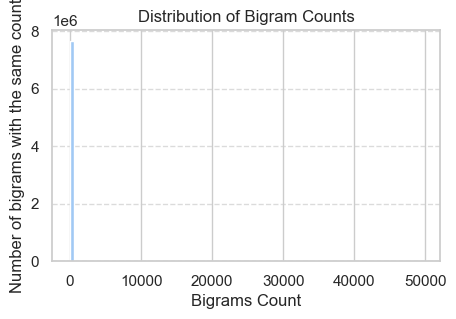

In [ ]:
# generated by GitHub Copilot with minor edits

# Plot the distribution of the bigrams
num_bins = 100
# I don't know how to plot an equal area histogram...it's all white...
# bin_edges = np.percentile(bigram_counts_df['total'], np.linspace(0, 100, num_bins + 1))
# bin_edges = np.interp(np.linspace(0, len(data), num_bins + 1), np.arange(len(data)), np.sort(data))

plt.figure(figsize=(5, 3))
plt.hist(bigram_counts_df['total'], bins=num_bins)
plt.title('Distribution of Bigram Counts')
plt.xlabel('Bigrams Count')
plt.ylabel('Number of bigrams with the same count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram confirms the fact that most bigrams are rare (people tend to say different word pairs). 

In [ ]:
bigram_counts_df['pos_ratio'] = bigram_counts_df['pos'] / bigram_counts_df['total']
bigram_counts_df['intensity'] = abs(bigram_counts_df['pos_ratio'] - 0.5) / 0.5  # [0, 1], how strongly the word is correlated with either positive or negative
bigram_counts_df = bigram_counts_df.sort_values(by='intensity', ascending=False)

bigram_counts_df.head()

,bigram,neg,pos,total,pos_ratio,intensity
5981056,#Java 21%,0,1,1,1.0,1.0
2025500,@Jeremiah_G I,1,0,1,0.0,1.0
2025487,both Finish,1,0,1,0.0,1.0
2025488,Finish New,1,0,1,0.0,1.0
2025489,tomorrow batteries,1,0,1,0.0,1.0


Again, let us find the most emotionally intense ~~words~~ bigrams.

In [ ]:
bigram_threshhold: float = 0.0001  # minimum relative frequency; play with this

bigram_counts_df = bigram_counts_df[bigram_counts_df['total'] > bigram_threshhold * TOTAL_NUMBER_OF_EXAMPLES]
bigram_counts_df.head()

,bigram,neg,pos,total,pos_ratio,intensity
42721,a Get,82,1659,1741,0.952901,0.905801
23029,you thank,86,1633,1719,0.949971,0.899942
763,my miss,4072,335,4407,0.076015,0.847969
2021,I'm sorry,1752,149,1901,0.078380,0.843240
2022,sorry to,1703,181,1884,0.096072,0.807856


In [ ]:
bigram_pos_df = bigram_counts_df[bigram_counts_df['pos_ratio'] > 0.5].sort_values(by='intensity', ascending=False)
bigram_neg_df = bigram_counts_df[bigram_counts_df['pos_ratio'] < 0.5].sort_values(by='intensity', ascending=False)

In [ ]:
bigram_pos_df.head()

,bigram,neg,pos,total,pos_ratio,intensity
42721,a Get,82,1659,1741,0.952901,0.905801
23029,you thank,86,1633,1719,0.949971,0.899942
461,day or,251,1697,1948,0.871150,0.742300
33520,thanks the,333,2046,2379,0.860025,0.720050
3719,you day,783,3151,3934,0.800966,0.601932


In [ ]:
bigram_neg_df.head()

,bigram,neg,pos,total,pos_ratio,intensity
763,my miss,4072,335,4407,0.076015,0.847969
2021,I'm sorry,1752,149,1901,0.078380,0.843240
2022,sorry to,1703,181,1884,0.096072,0.807856
3536,miss so,1774,294,2068,0.142166,0.715667
9845,I wish,2330,457,2787,0.163976,0.672049


In [ ]:
NUMBER_OF_WORDS = 20

print(f"Top {NUMBER_OF_WORDS} positive bigrams: {bigram_pos_df['bigram'].iloc[:NUMBER_OF_WORDS].values}")
print(f"Top {NUMBER_OF_WORDS} negative bigrams: {bigram_neg_df['bigram'].iloc[:NUMBER_OF_WORDS].values}")

Top 20 positive bigrams: ['a Get' 'you thank' 'day or' 'thanks the' 'you day' 'great a' 'the your'
 'to listening' 'the for' 'let know' 'so love' 'you the' 'you some'
 'good time' 'love of' 'with your' 'you on' 'love is' 'love at' 'good to']
Top 20 negative bigrams: ['my miss' "I'm sorry" 'sorry to' 'miss so' 'I wish' 'me miss' 'wish to'
 'i want' 'I wanna' 'but to' 'why i' "but can't" 'go i' 'i wanna' 'no for'
 'no but' 'I no' 'go I' 'to missed' 'for wish']


Compare this result with the top 20 words (unfiltered): 

- Positive: ['#followfriday' 'welcome' 'Welcome' 'Once' 'Thanks!' 'Thank' 'Thanks' 'smile' 'proud' 'thanks!' 'thank' 'thanks' 'Happy' 'Nice' 'wonderful' 'Goodnight' 'Get' 'Hi' 'Hello' 'Glad']
- Negative: ['Sad' 'sad.' 'sad' 'hurts' 'throat' 'headache' 'Poor' 'upset' 'sucks' 'died' 'sick.' 'sick' 'tummy' 'ugh' 'stomach' 'poor' 'horrible' 'broken' 'sucks.' 'worst']

##### Positive
For positive, words like 'thank' and 'love' overlap, but we also see new information. It is interesting how 'good' made it into the top 20 not with unigrams but with bigrams, and how 'listening' and 'with' are also strongly positive words. 

##### Negative
For negative, the list completely changed. Notice that 'sad', 'sick', 'sucks' and its variations completely disappeared from the list and is replaced with 'miss', 'sorry', 'wish', 'want', 'no'. It seems like bigrams could be good at capturing the negative emotion of sympathy/regret/disappointment (for not having one's desires fulfilled), whereas unigrams are better with sadnesses more direcly expressed and pain. This makes sense since it's hard for one word to embed complex emotion. 

##### You vs. I
Can't help but notice that bigrams reveal the deep truth that we become happier when we think about ourselves less (humility): 7/20 of the top 20 positive bigrams contains 'you' or a variation, and 11/20 of the top 20 negative bigrams contains 'I' or a variation. (Don't think this will help a lot with classification but it's such good evidence supporting the wisdom of God's commandments.)

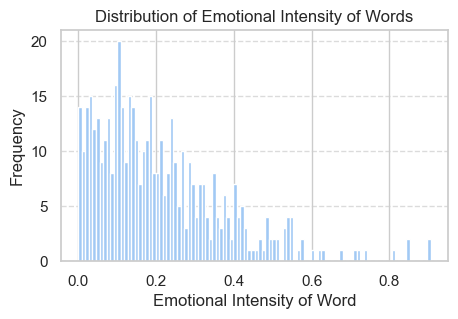

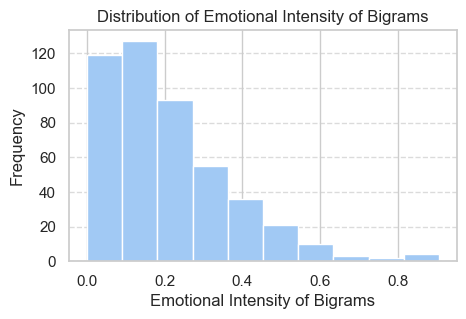

In [ ]:
# Plot the distribution of intensity

# bin = 100
plt.figure(figsize=(5, 3))
plt.hist(bigram_counts_df['intensity'], bins=100)
plt.title('Distribution of Emotional Intensity of Words')
plt.xlabel('Emotional Intensity of Word')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# bin = 10
plt.figure(figsize=(5, 3))
plt.hist(bigram_counts_df['intensity'], bins=10)
plt.title('Distribution of Emotional Intensity of Bigrams')
plt.xlabel('Emotional Intensity of Bigrams')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The distribution is **not** quintessentially right-skewed! According to the histogram, most bigrams are still emotionally mild, but compared to words less bigrams are emotionally neutral, i.e., bigrams tend to be more mildly associated with emotions than words. The little bump at the tail of the distribution shows that though people do tend to use more emotionally mild bigrams in tweets, they actually use the most emotionally intense bigrams *a bit more* than the second-most emotionally intense ones-but still, just a bit. 

Whereas for individual words, basically the more intense the word is the less it is used...